# **Clustering Analysis**

**Objective:**

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preprocessing**

In [161]:
df=pd.read_excel("/content/EastWestAirlines.xlsx")
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [162]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [163]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [164]:
# Drop the ID# column as it is not useful for clustering
df = df.drop('ID#', axis=1)

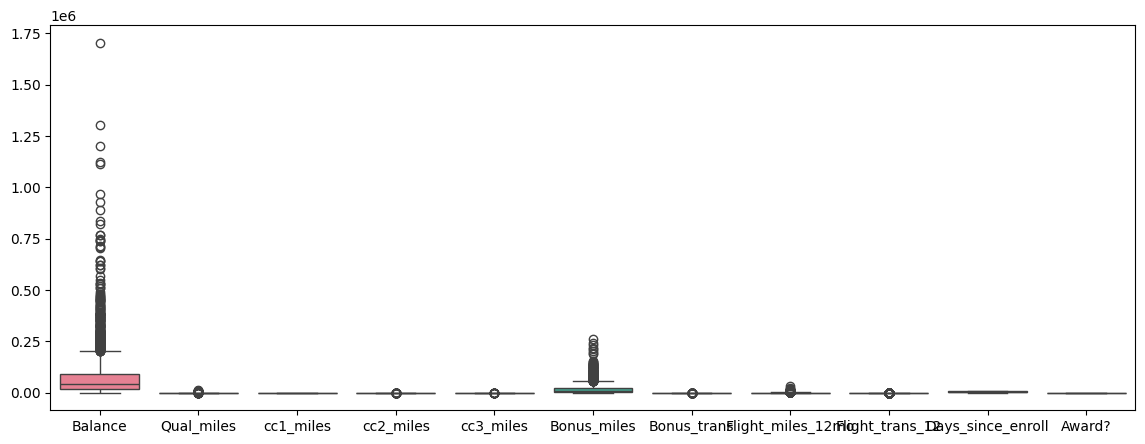

In [165]:
figure=plt.figure(figsize=(14,5))
sns.boxplot(data=df)
plt.show()

In [166]:
import numpy as np

for col in df.columns:
  if df[col].dtype != 'object':
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
    df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
print("Outlier Treated")

Outlier Treated


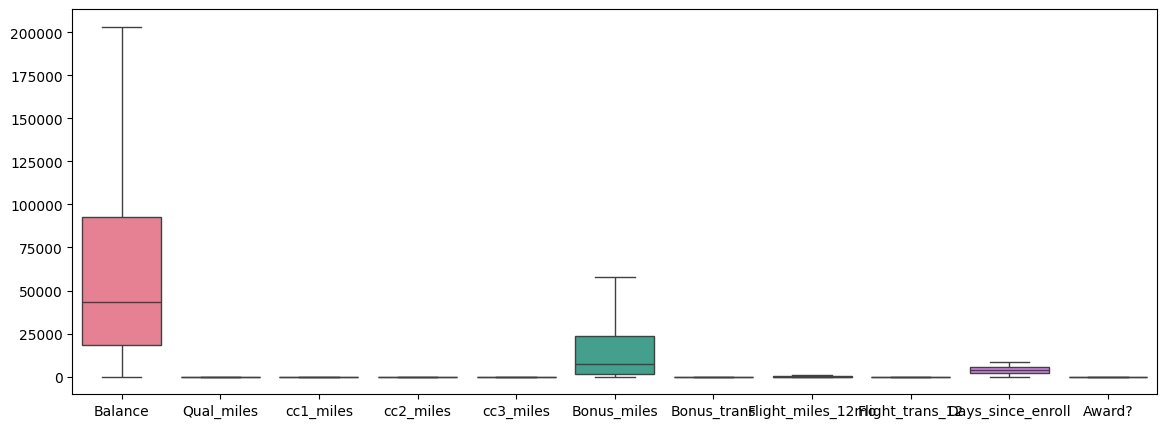

In [167]:
figure=plt.figure(figsize=(14,5))
sns.boxplot(data=df)
plt.show()

In [168]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df=pd.DataFrame(df_scaled, columns=df.columns)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1    -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2    -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3    -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4     0.579265         0.0   1.409471        0.0        0.0     1.543191   
...        ...         ...        ...        ...        ...          ...   
3994 -0.772038         0.0  -0.769578        0.0        0.0    -0.381007   
3995  0.010506         0.0  -0.769578        0.0        0.0    -0.798437   
3996  0.167530         0.0   0.683121        0.0        0.0     0.555335   
3997 -0.151188         0.0  -0.769578        0.0        0.0    -0.825052   
3998 -1.035562         0.0  -0.769578        0.0        0.0    -0.852718   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.148854          -0.604313        -0.626143           1.395454   
1       -1.039133          -0.604313        -0.626143           1.379957   
2       -0.819689          -0.604313        -0.626143           1.411920   
3       -1.148854          -0.604313        -0.626143           1.372208   
4        1.594189           2.034489         2.020176           1.363975   
...           ...                ...              ...                ...   
3994    -0.819689           0.074478         0.432384          -1.315120   
3995    -0.709967          -0.604313        -0.626143          -1.318994   
3996    -0.380802          -0.604313        -0.626143          -1.315604   
3997    -1.148854           1.092666         0.432384          -1.316088   
3998    -1.258576          -0.604313        -0.626143          -1.317541   

        Award?  
0    -0.766919  
1    -0.766919  
2    -0.766919  
3    -0.766919  
4     1.303918  
...        ...  
3994  1.303918  
3995  1.303918  
3996  1.303918  
3997 -0.766919  
3998 -0.766919  

[3999 rows x 11 columns]

In [169]:
df.shape

(3999, 11)

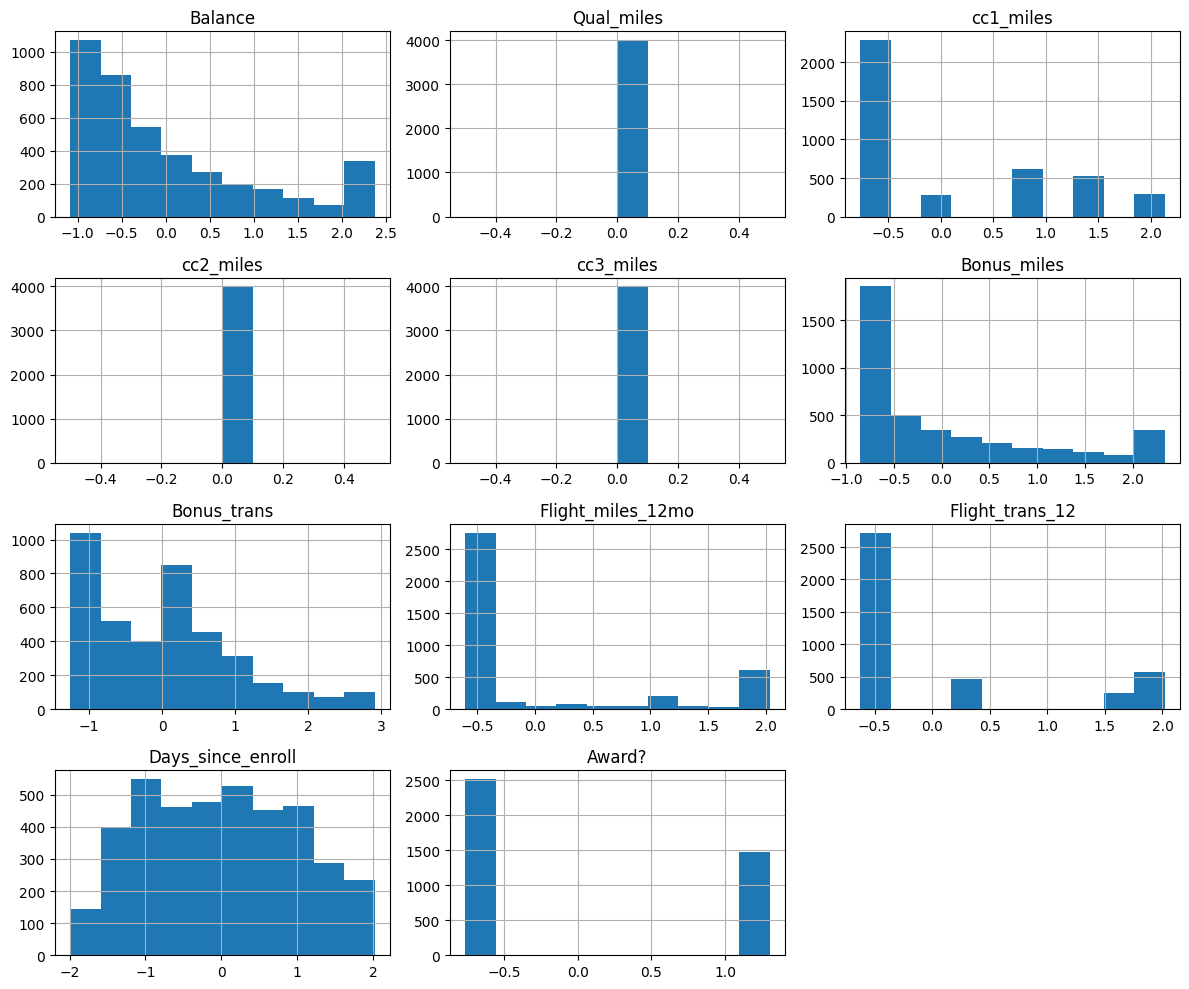

In [170]:
# Visualize the distribution of features using histograms and density plots
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

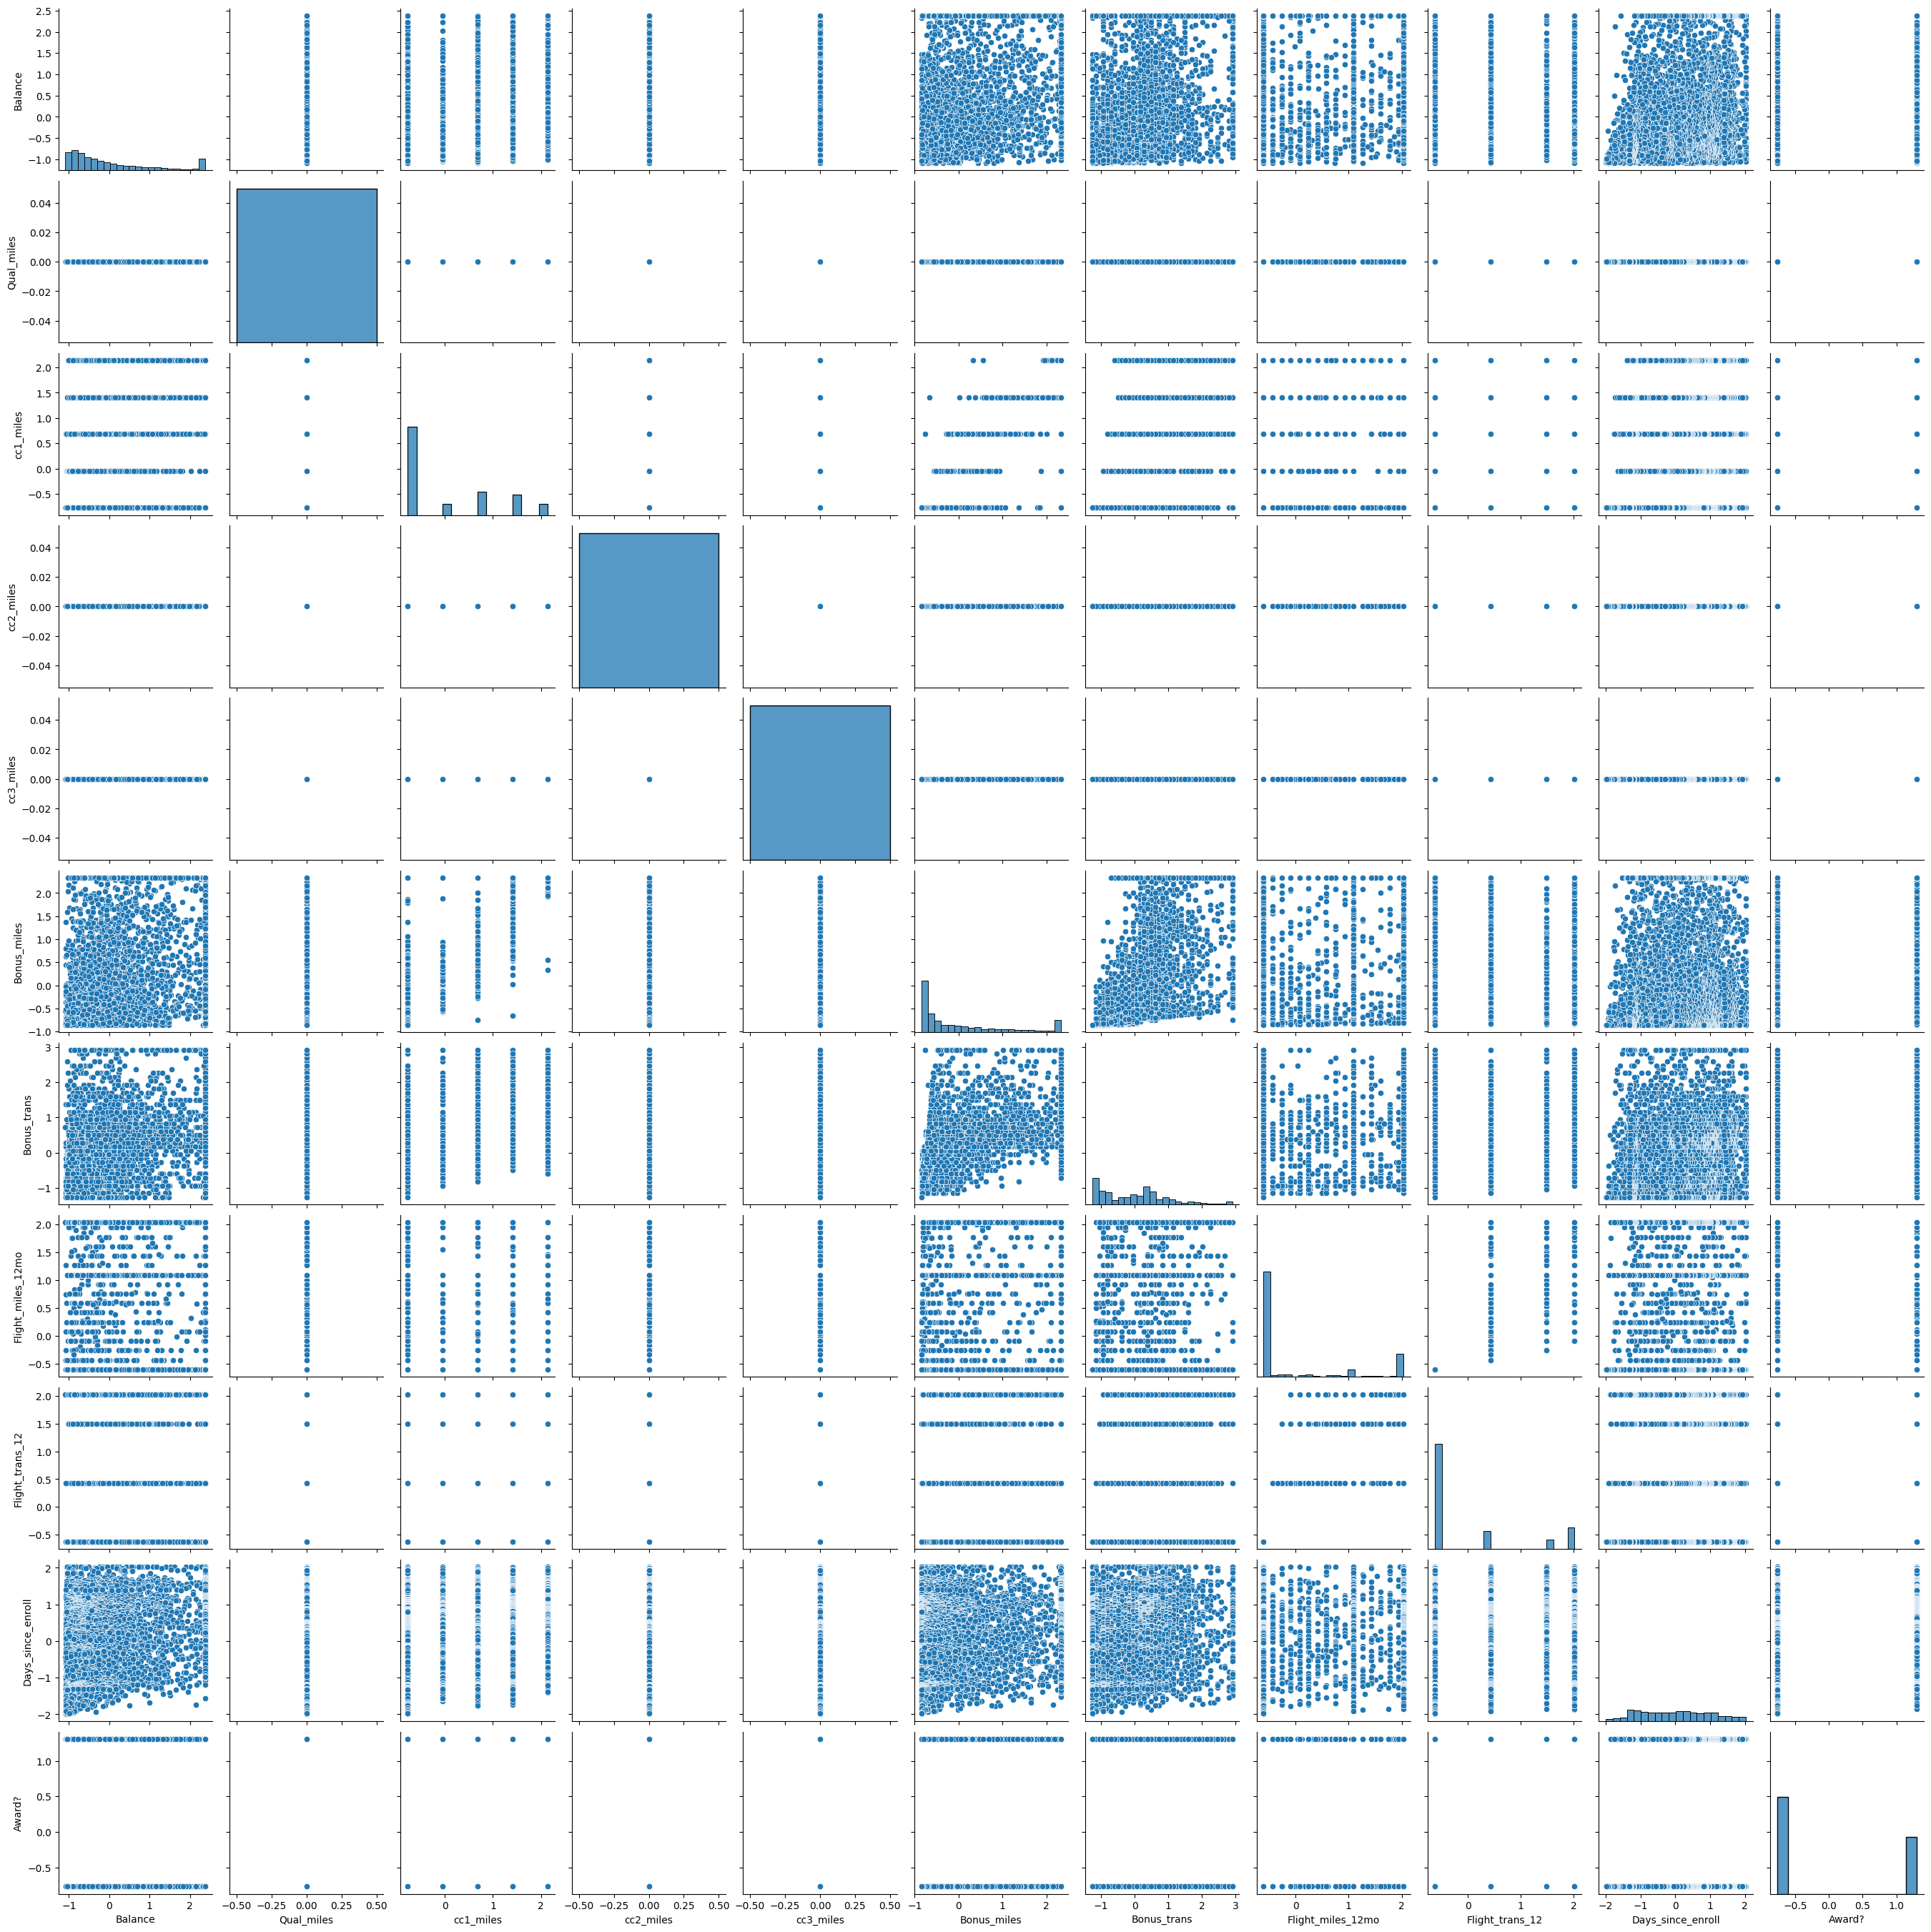

In [171]:
# Visualize the relationships between pairs of features using a pairplot
sns.pairplot(df)
plt.show()

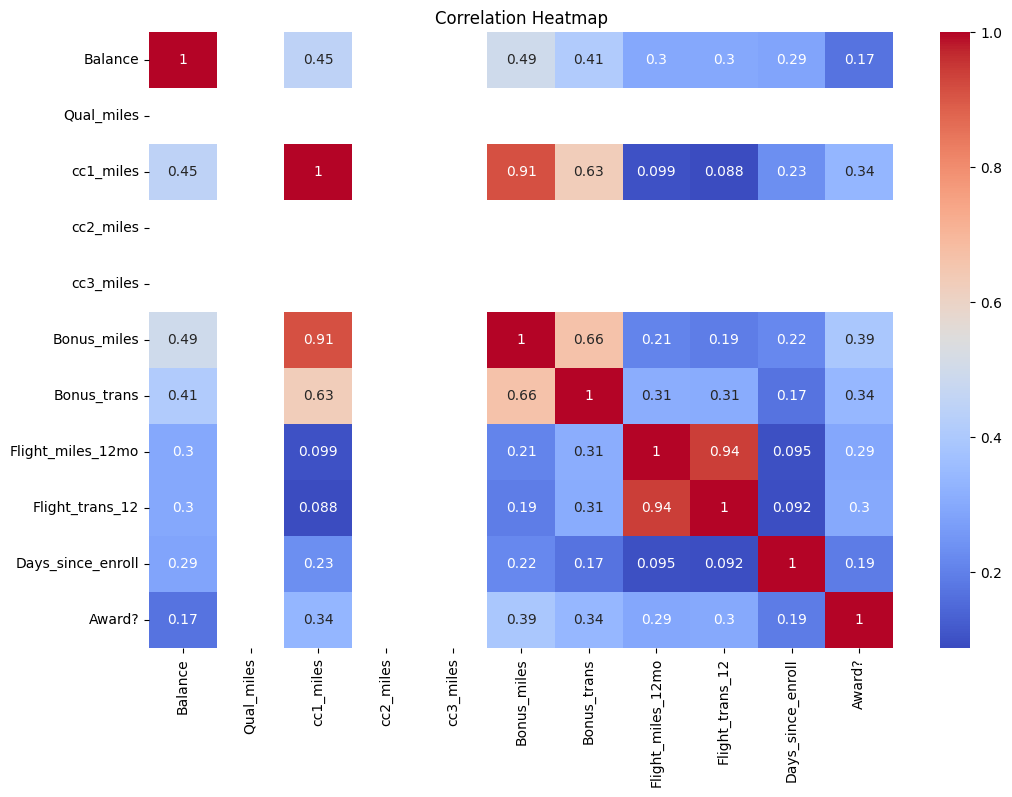

In [172]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [173]:
h_df=df.copy()
h_df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1 -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2 -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3 -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4  0.579265         0.0   1.409471        0.0        0.0     1.543191   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.148854          -0.604313        -0.626143           1.395454   
1    -1.039133          -0.604313        -0.626143           1.379957   
2    -0.819689          -0.604313        -0.626143           1.411920   
3    -1.148854          -0.604313        -0.626143           1.372208   
4     1.594189           2.034489         2.020176           1.363975   

     Award?  
0 -0.766919  
1 -0.766919  
2 -0.766919  
3 -0.766919  
4  1.303918

In [174]:
d_df=df.copy()
d_df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1 -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2 -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3 -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4  0.579265         0.0   1.409471        0.0        0.0     1.543191   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.148854          -0.604313        -0.626143           1.395454   
1    -1.039133          -0.604313        -0.626143           1.379957   
2    -0.819689          -0.604313        -0.626143           1.411920   
3    -1.148854          -0.604313        -0.626143           1.372208   
4     1.594189           2.034489         2.020176           1.363975   

     Award?  
0 -0.766919  
1 -0.766919  
2 -0.766919  
3 -0.766919  
4  1.303918

# **Implementing Clustering Algorithms**

# **K-Means**

In [175]:
# Elbow method(No. of cluster find)
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,21):
  km=KMeans(n_clusters=i, init='k-means++')
  km.fit(df)
  wcss.append(km.inertia_)

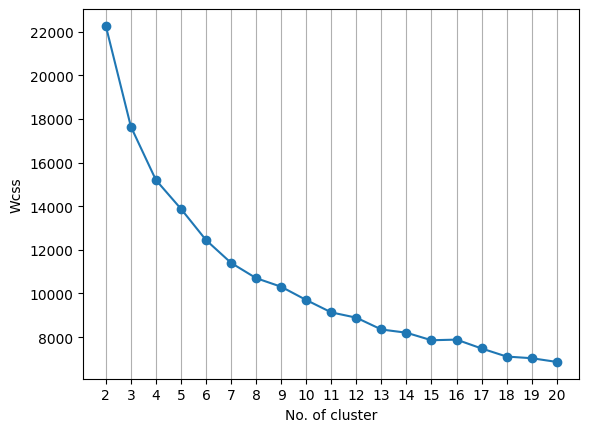

In [176]:
# Create a line plot across Wcss and no. of cluster
plt.plot([i for i in range(2,21)],wcss, marker='o')
plt.xlabel('No. of cluster')
plt.ylabel('Wcss')
plt.xticks([i for i in range(2,21)])
plt.grid(axis="x")
plt.show()


In [177]:
# perfect prediction
kmn=KMeans(n_clusters=3, init='k-means++')
kmn.fit_predict(df)
df["Predict"]=kmn.fit_predict(df)

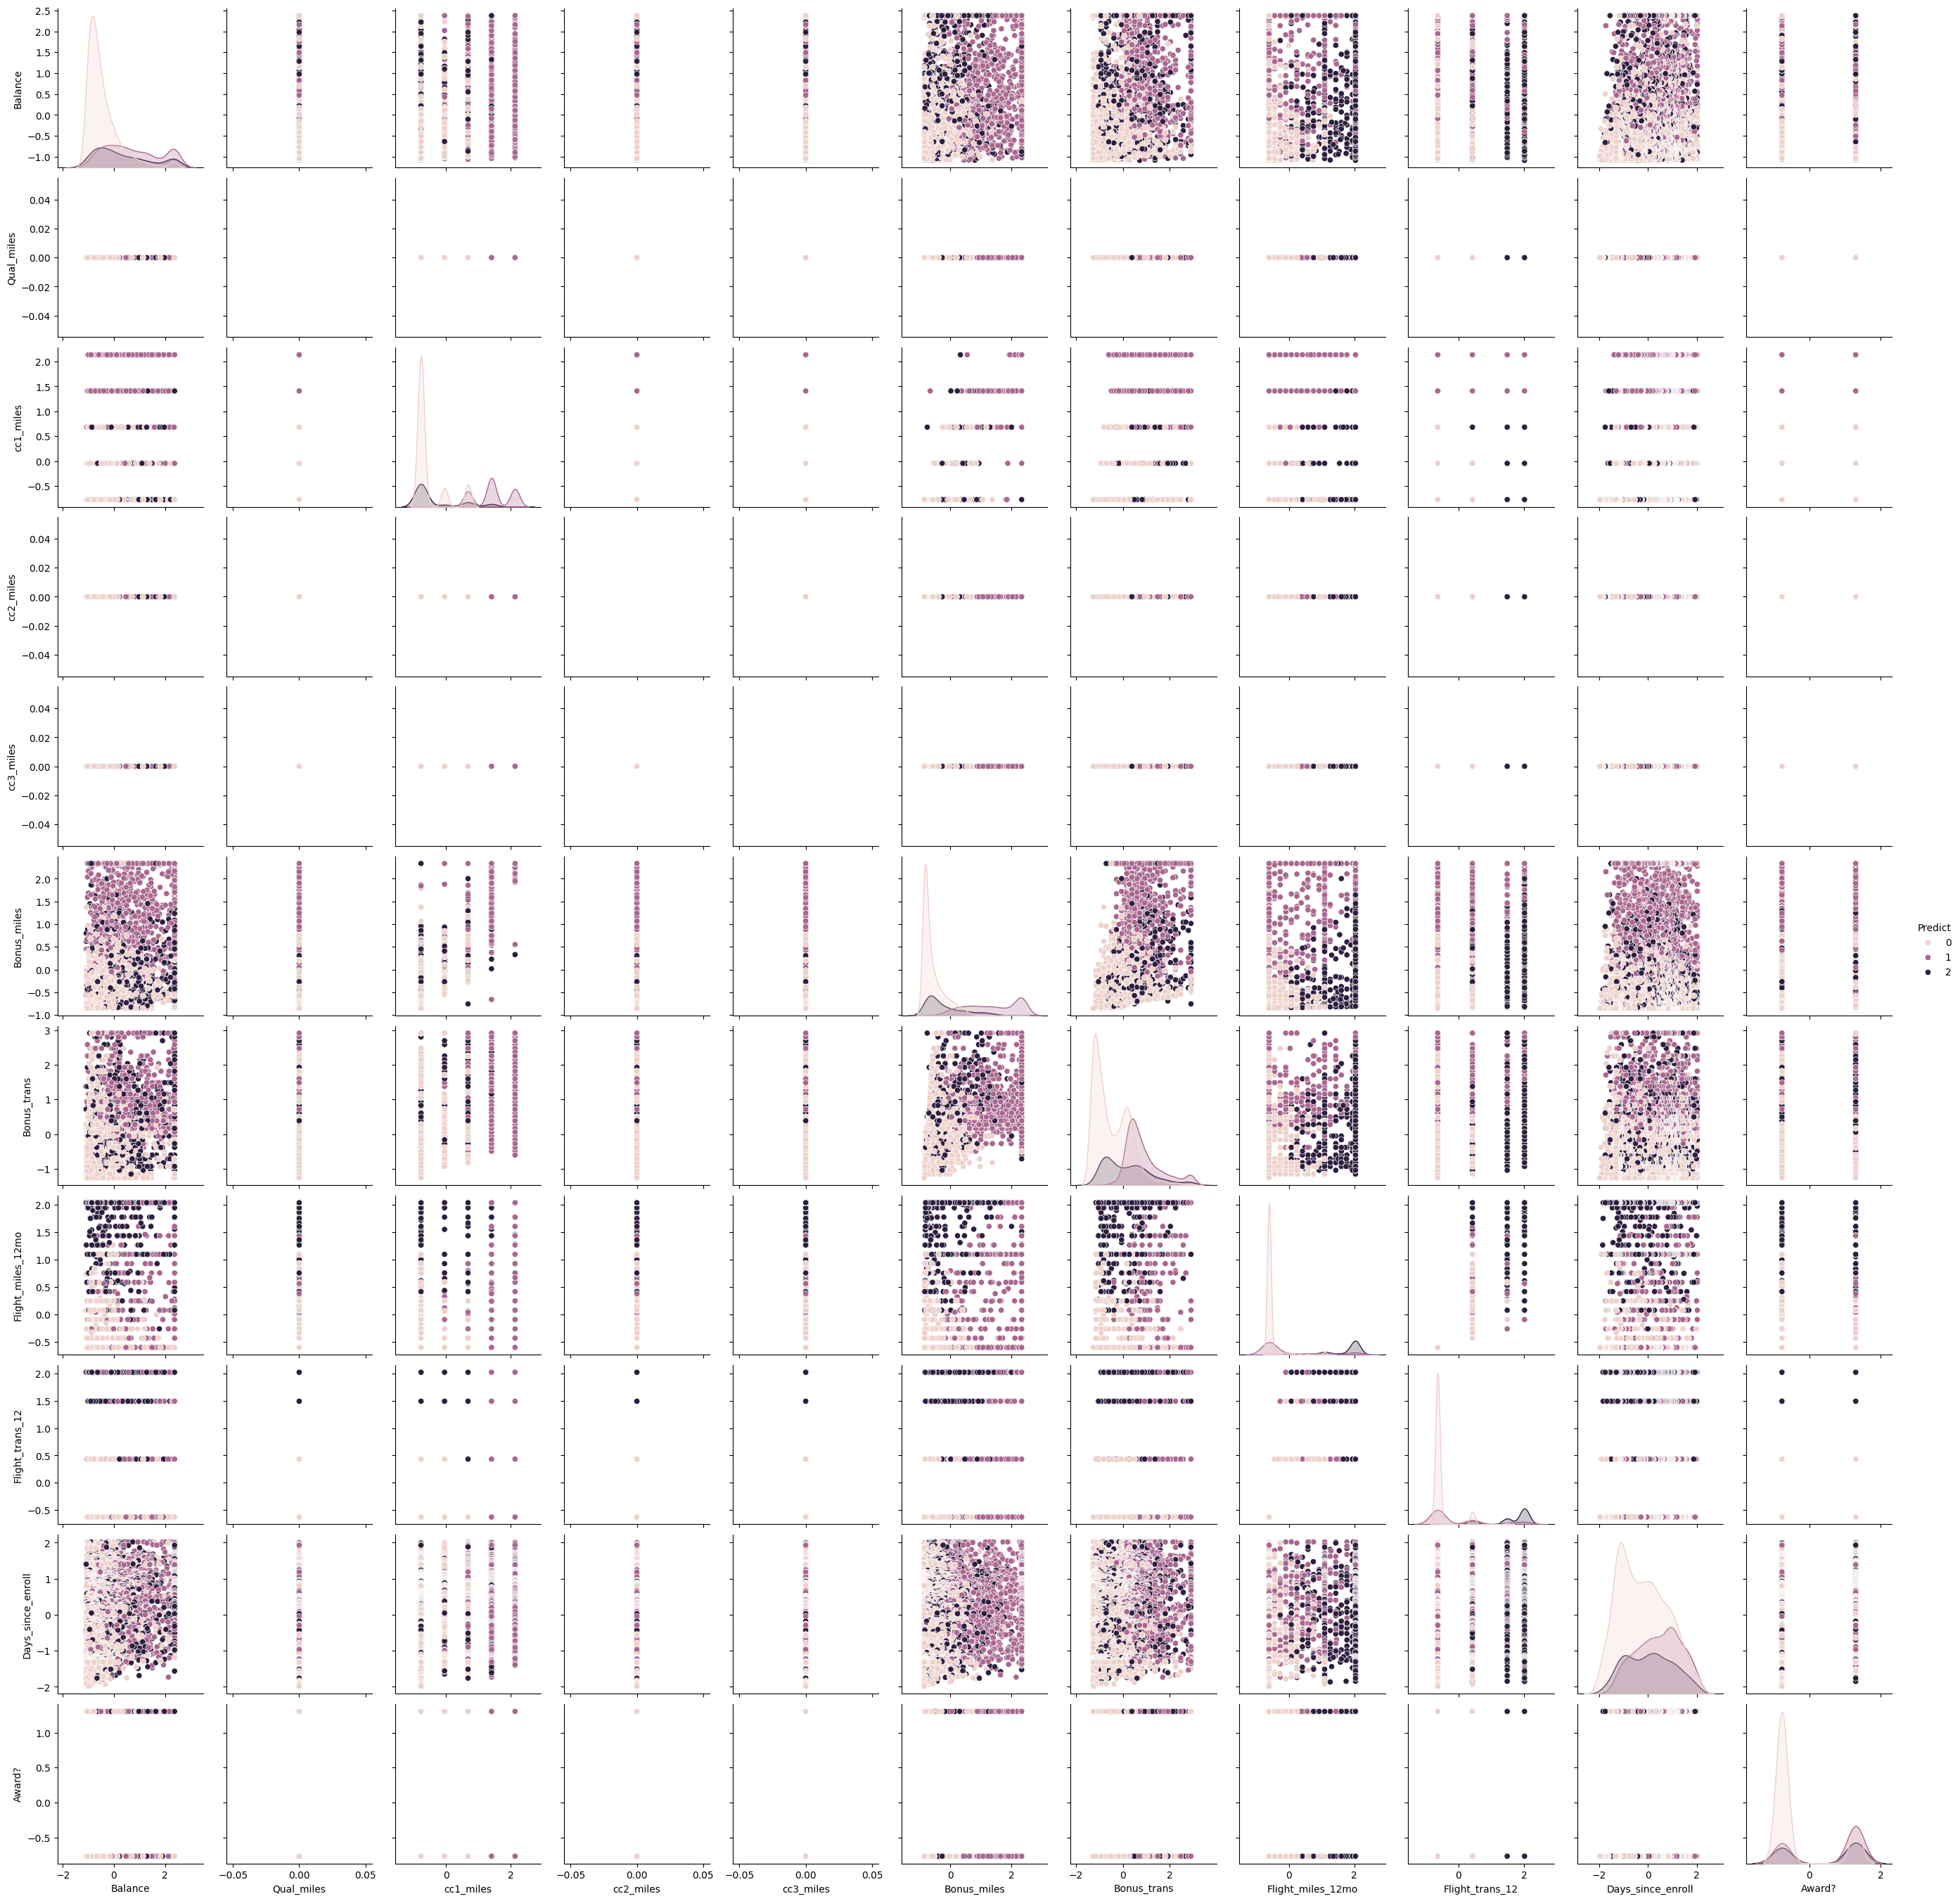

In [178]:
sns.pairplot(df,hue="Predict")
plt.show()

# **Heirarchical Clustering**

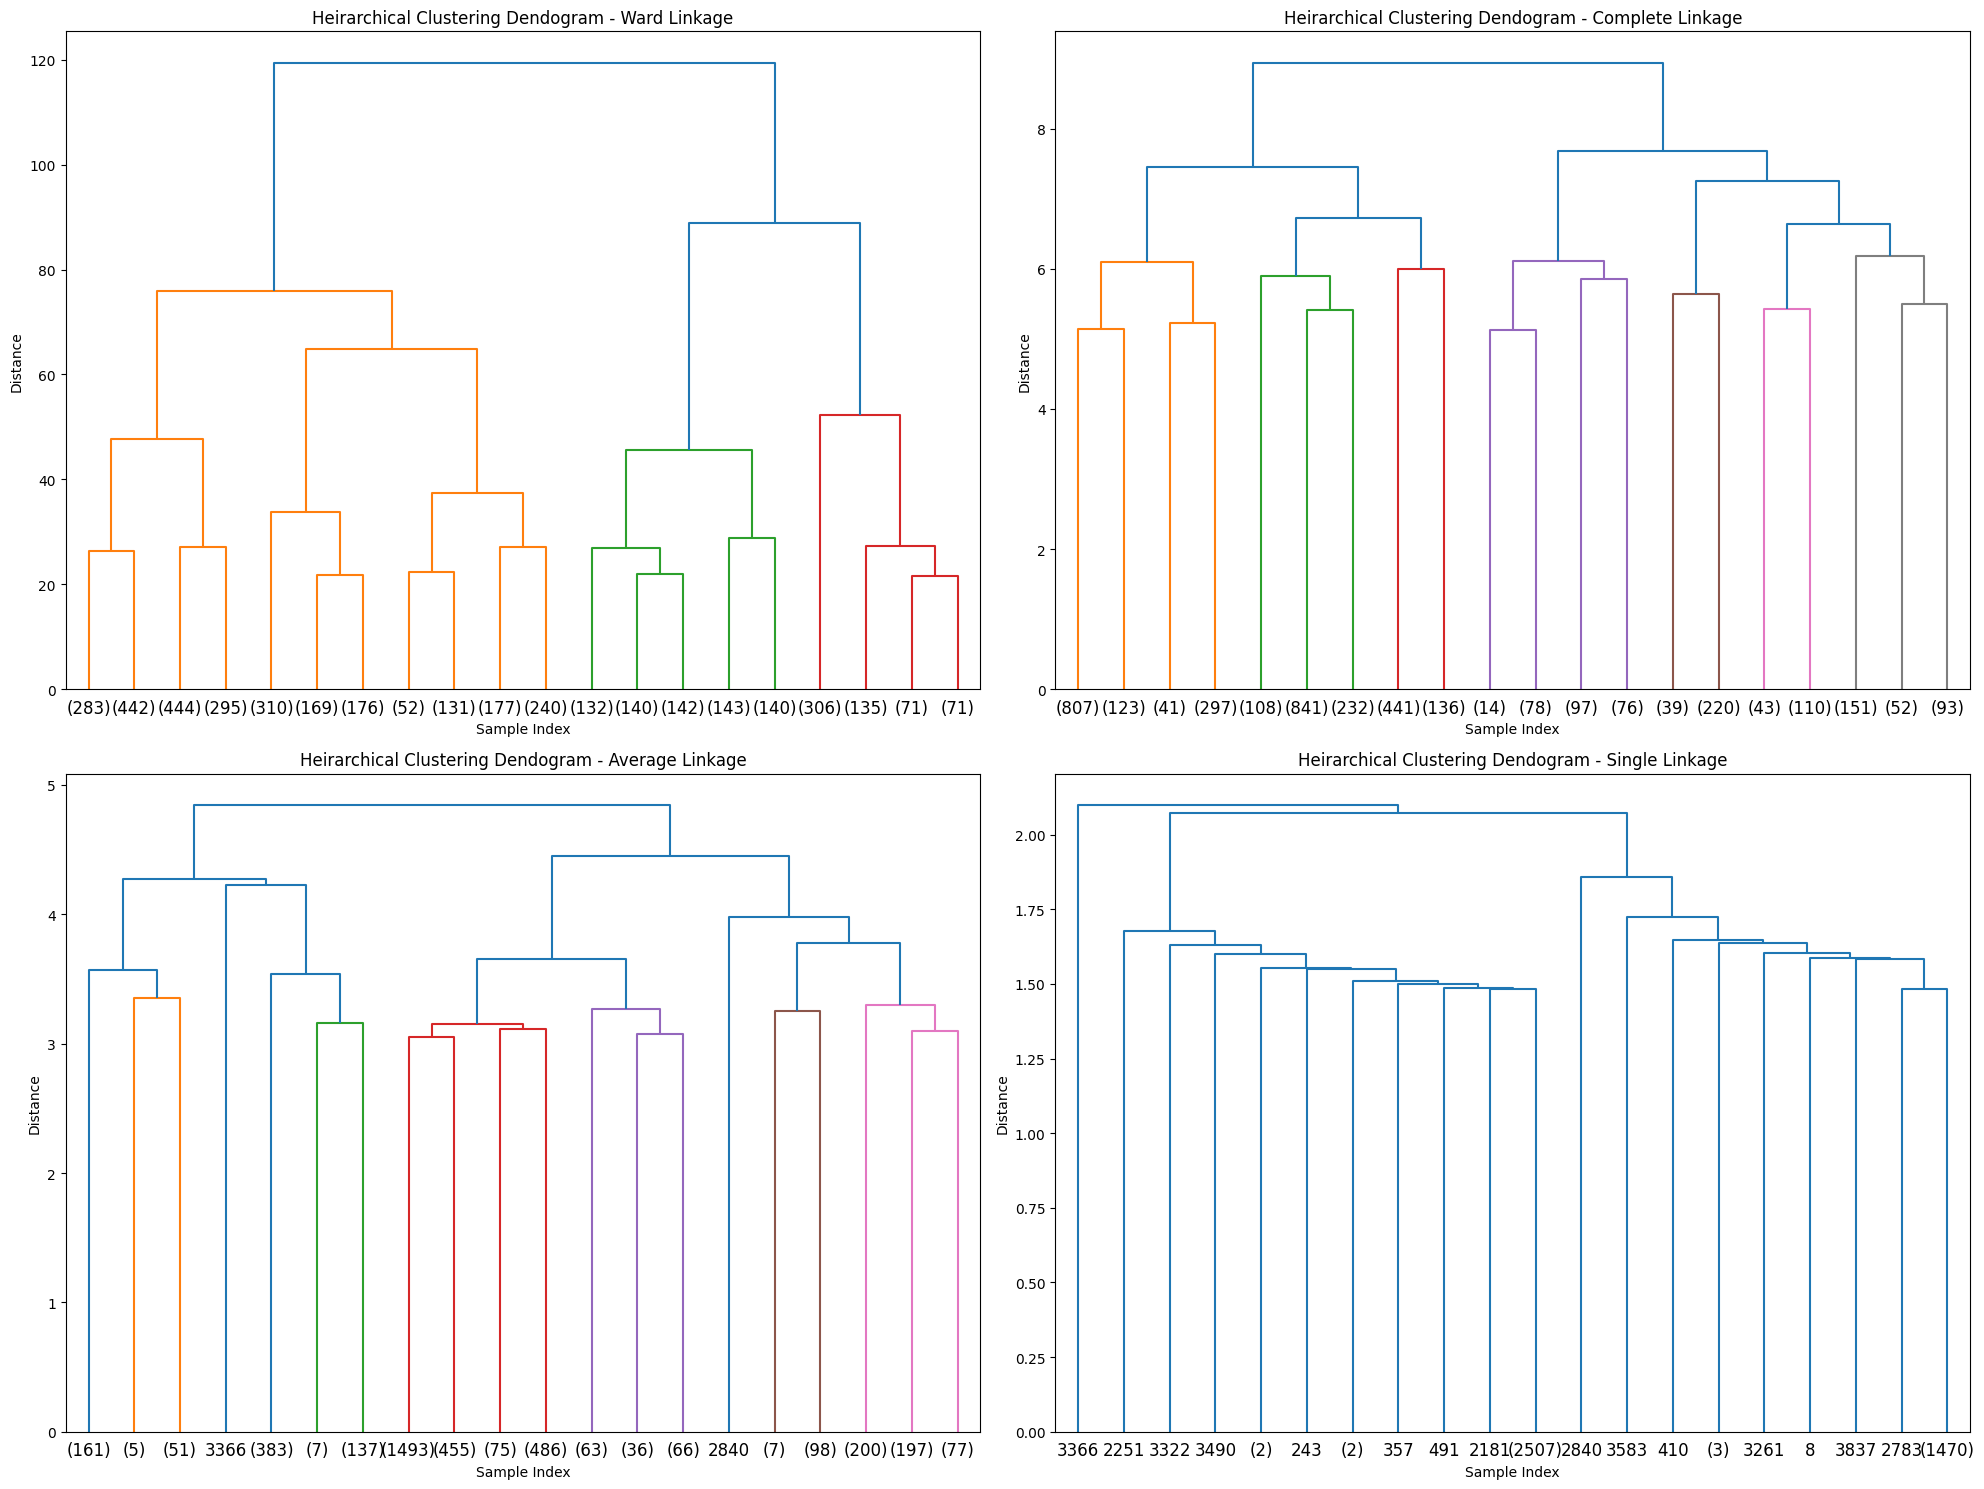

In [179]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Heirarchical Clustering with different linkage methods
linkage_methods=['ward','complete', 'average', 'single']

plt.figure(figsize=(20,15))

for i, method in enumerate(linkage_methods, 1):
  plt.subplot(2, 2, i)

  # Perform heirarchical clustering
  Z = linkage(h_df, method=method)

  # Create dendogram
  dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
  plt.title(f"Heirarchical Clustering Dendogram - {method.capitalize()} Linkage")
  plt.xlabel("Sample Index")
  plt.ylabel("Distance")
plt.tight_layout()
plt.show()

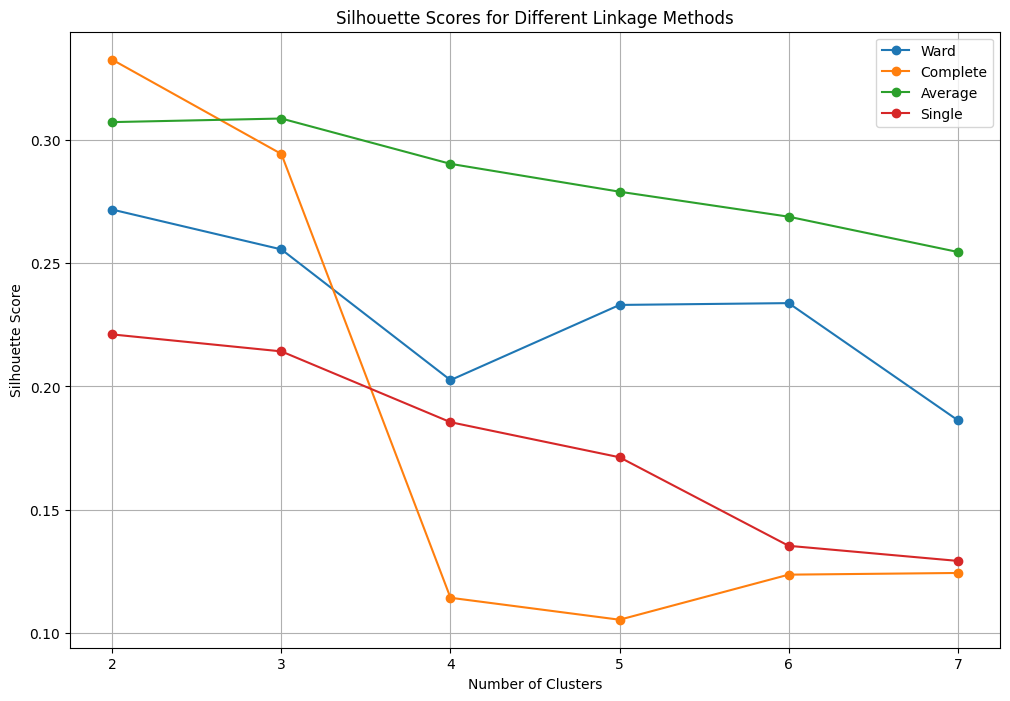


Best linkage method: complete
Optimal number of clusters: 2
Best silhouette score: 0.3324


In [180]:
from sklearn.metrics import silhouette_score
# Compare different linkage methods with silhoutte scores
linkage_results={}

for method in linkage_methods:
  silhouette_scores_list=[]
  k_range= range(2,8)

  for k in k_range:
    try:
      heirarchical=AgglomerativeClustering(n_clusters=k, linkage=method)
      cluster_labels=heirarchical.fit_predict(h_df)

      # Calculate silhoutte Score
      if len(np.unique(cluster_labels))>1:
        silhouette_avg=silhouette_score(h_df, cluster_labels)
        silhouette_scores_list.append(silhouette_avg)
      else:
        silhouette_scores_list.append(-1)
    except Exception as e:
      print(f"Error with {method} linkage and {k} clusters: {e}")
      silhouette_scores_list.append(-1)

  linkage_results[method]=silhouette_scores_list

# Plot silhouette scores for different linkage methods
plt.figure(figsize=(12, 8))
for method, scores in linkage_results.items():
    plt.plot(range(2, 8), scores, marker='o', label=method.capitalize())

plt.title('Silhouette Scores for Different Linkage Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Find the best linkage method and optimal number of clusters
best_score = -1
best_method = None
best_k = 0

for method, scores in linkage_results.items():
    max_score = max(scores)
    k_optimal = scores.index(max_score) + 2

    if max_score > best_score:
        best_score = max_score
        best_method = method
        best_k = k_optimal

print(f"\nBest linkage method: {best_method}")
print(f"Optimal number of clusters: {best_k}")
print(f"Best silhouette score: {best_score:.4f}")

In [181]:
# Perform final hierarchical clustering with best parameters
try:
    best_hierarchical = AgglomerativeClustering(n_clusters=best_k, linkage=best_method)
    hierarchical_labels = best_hierarchical.fit_predict(h_df)

    # Add cluster labels to the original dataframe
    h_df['Hierarchical_Cluster'] = hierarchical_labels

    print(f"Hierarchical clustering completed successfully with {best_k} clusters using {best_method} linkage")

except Exception as e:
    print(f"Error in final hierarchical clustering: {e}")
    # Fallback to default parameters
    best_hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
    hierarchical_labels = best_hierarchical.fit_predict(h_df)
    df['Hierarchical_Cluster'] = hierarchical_labels
    best_k = 3
    best_method = 'ward'

Hierarchical clustering completed successfully with 2 clusters using complete linkage


# **DBSCAN**

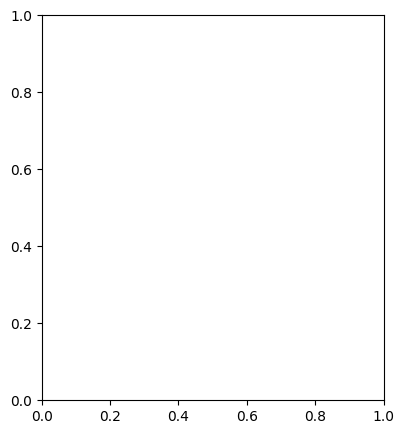

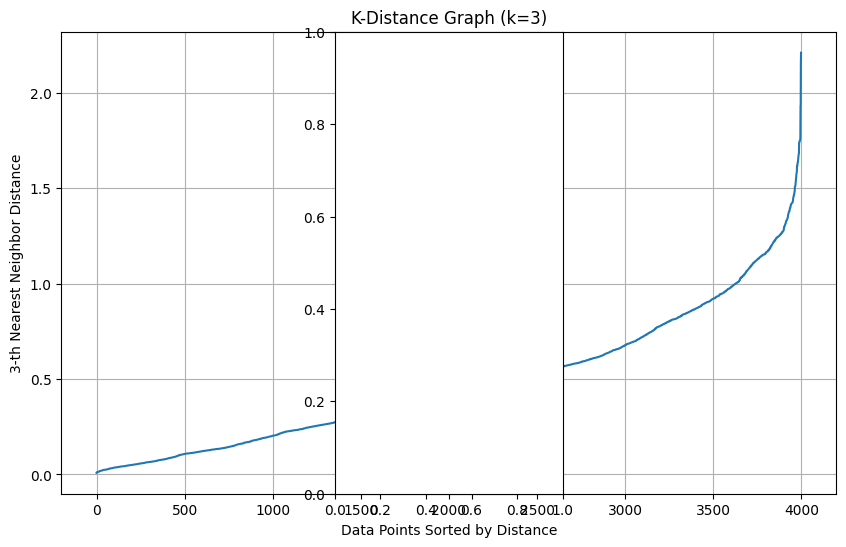

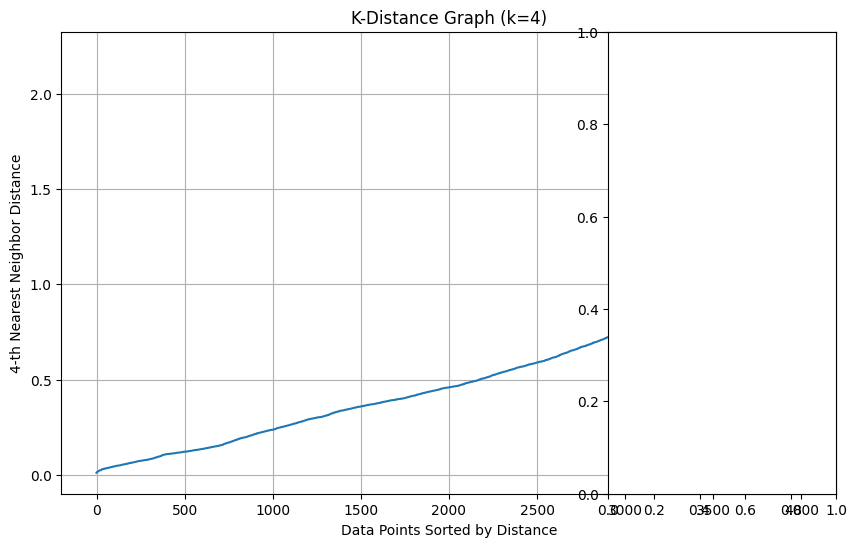

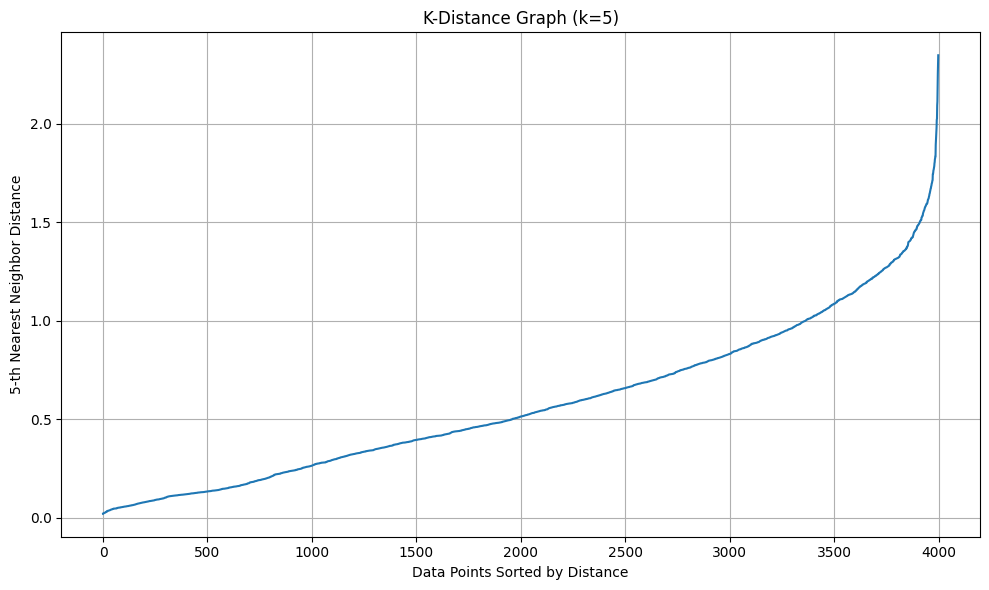

In [182]:
# Predict using DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Enhanced DBSCAN with parameter tuning
# Method 1 : k-distance plot to estimate eps
def plot_k_distance(data, k=4):
  neighbors= NearestNeighbors(n_neighbors=k)
  neighbors_fit=neighbors.fit(data)
  distances, indices=neighbors_fit.kneighbors(data)

  # Sort distances
  distances=np.sort(distances[:, k-1], axis=0)

  plt.figure(figsize=(10, 6))
  plt.plot(distances)
  plt.title(f'K-Distance Graph (k={k})')
  plt.xlabel('Data Points Sorted by Distance')
  plt.ylabel(f'{k}-th Nearest Neighbor Distance')
  plt.grid(True)

  return distances

# Plot k-distance graph for different k values
k_values = [3, 4, 5]

plt.figure(figsize=(15, 5))
for i, k in enumerate(k_values, 1):
    plt.subplot(1, 3, i)
    distances = plot_k_distance(d_df, k)
    plt.title(f'K-Distance Graph (k={k})')

plt.tight_layout()
plt.show()

In [183]:
# Define parameter range of grid search
eps_range = np.arange(0.5, 3.0, 0.2) # Reduced step size for fast computation
min_samples_range= range(3, 8)
# Method 2 : Grid search for optimal DBSCAN parameters
def evaluate_dbscan(data, eps_range, min_samples_range):
  results=[]
  for eps in eps_range:
    for min_samples in min_samples_range:
      try:
        dbscan=DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels=dbscan.fit_predict(data)

        # Count Cluster (excluding noise points labeled as -1)
        n_clusters=len(set(cluster_labels))- (1 if -1 in cluster_labels else 0)
        n_noise_points=list(cluster_labels).count(-1)

        # Calculate silhoutte score
        if n_clusters > 1:
          silhouette_avg=silhouette_score(data, cluster_labels)
        else:
          silhouette_avg= -1

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise_points': n_noise_points,
            'noise_ratio': n_noise_points/len(data),
            'silhouette_score': silhouette_avg
            })
      except Exception as e:
        print(f"Error with eps={eps} and min_samples={min_samples}: {e}")
        continue
  return pd.DataFrame(results)


print("Performing DBSCAN grid search...")
dbscan_results_df = evaluate_dbscan(d_df, eps_range, min_samples_range)

# Filter out results with too many noise points or too few clusters
filtered_results = dbscan_results_df[
    (dbscan_results_df['n_clusters'] > 1) &
    (dbscan_results_df['n_clusters'] < 10) &
    (dbscan_results_df['noise_ratio'] < 0.3)  # Less than 30% noise
]

if len(filtered_results) > 0:
    # Find the best parameters
    best_dbscan_row = filtered_results.loc[filtered_results['silhouette_score'].idxmax()]
else:
    # If no good results found, use the original results
    best_dbscan_row = dbscan_results_df.loc[dbscan_results_df['silhouette_score'].idxmax()]

print("Best DBSCAN parameters:")
print(best_dbscan_row)

Performing DBSCAN grid search...
Best DBSCAN parameters:
eps                 1.700000
min_samples         3.000000
n_clusters          2.000000
n_noise_points      3.000000
noise_ratio         0.000750
silhouette_score    0.221406
Name: 30, dtype: float64


In [184]:
# Perform DBSCAN with best parameters
best_eps = best_dbscan_row['eps']
best_min_samples = int(best_dbscan_row['min_samples'])

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(d_df)

# Add DBSCAN cluster labels to dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Analyze DBSCAN results
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nDBSCAN Results:")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Noise percentage: {(n_noise/len(df))*100:.2f}%")

if n_clusters > 1:
    dbscan_silhouette = silhouette_score(d_df, dbscan_labels)
    print(f"Silhouette Score: {dbscan_silhouette:.4f}")


DBSCAN Results:
Number of clusters: 2
Number of noise points: 3
Noise percentage: 0.08%
Silhouette Score: 0.2214


# **Clustering Analysis Interpretation**

**Analysis of K-Means Clusters**

Based on the pairplot visualization, the K-Means algorithm with 3 clusters seems to have separated the data into distinct groups. We can analyze the characteristics of each cluster by looking at the average values of the features within each cluster.
* Cluster 0: This cluster appears to represent customers with average balance, bonus miles, and transactions. They have a moderate number of days since enrollment and a low likelihood of being awarded.
* Cluster 1: This cluster likely represents customers with high balance, bonus miles, and transactions. They have been enrolled for a longer period and have a higher likelihood of being awarded.
* Cluster 2: This cluster seems to represent customers with low balance, bonus miles, and transactions. They have been enrolled for a shorter period and have a low likelihood of being awarded.

**Analysis of Hierarchical Clusters**

The hierarchical clustering with 2 clusters, as shown in the pairplot, also reveals some separation.
* Cluster 0: This cluster appears to be similar to Cluster 1 from the K-Means analysis, representing customers with higher engagement (balance, bonus miles, transactions) and a higher likelihood of being awarded.
* Cluster 1: This cluster seems to encompass customers with lower engagement and a lower likelihood of being awarded, similar to Clusters 0 and 2 from the K-Means analysis combined.

**Analysis of DBSCAN Clusters**

The DBSCAN algorithm's performance can be sensitive to the eps and min_samples parameters. The scatterplot only shows a few clusters.
* Cluster 0: This is the largest cluster and seems to represent the majority of the data points, which might be considered "core" points by the algorithm.
* Cluster -1: These are the noise points that do not belong to any cluster.

Further analysis and tuning of the eps and min_samples parameters would be necessary to determine if DBSCAN is suitable for this dataset and to identify more meaningful clusters. The current results suggest that the data might not have dense regions that are well-separated, which is a requirement for DBSCAN to perform effectively.

# **Visualization**

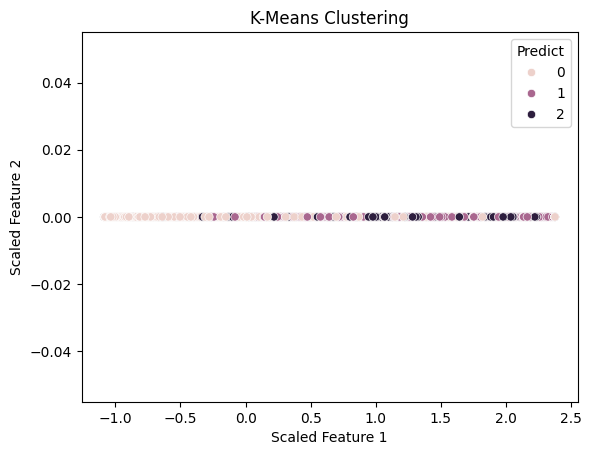

In [185]:
# Visualize the K-Means clustering results with different color
sns.scatterplot(x=df['Balance'], y=df['Qual_miles'], hue=df['Predict'])
plt.title('K-Means Clustering')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()


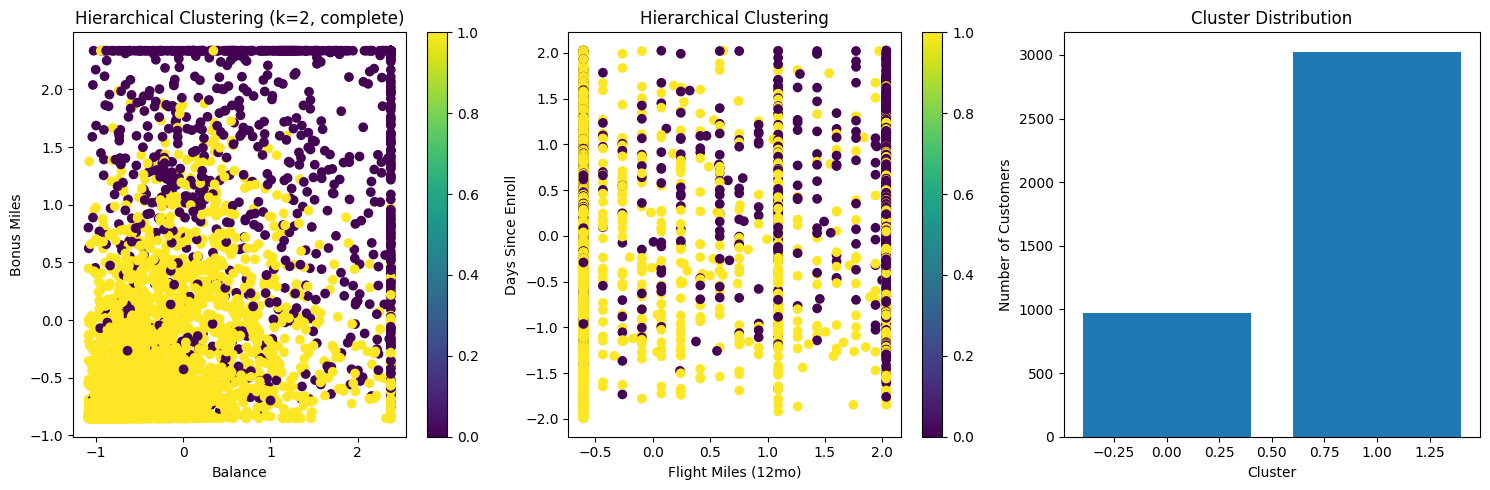


Hierarchical Clustering - Cluster Characteristics:
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Hierarchical_Cluster                                                         
0                        0.97         0.0       1.11        0.0        0.0   
1                       -0.31         0.0      -0.36        0.0        0.0   

                      Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_Cluster                                                
0                            1.28         1.03               0.83   
1                           -0.41        -0.33              -0.27   

                      Flight_trans_12  Days_since_enroll  Award?  
Hierarchical_Cluster                                              
0                                0.80               0.39    0.68  
1                               -0.26              -0.12   -0.22  


In [186]:
# Visualize hierarchical clustering results
plt.figure(figsize=(15, 5))

# Plot 1: Balance vs Bonus_miles colored by clusters
plt.subplot(1, 3, 1)
scatter = plt.scatter(h_df['Balance'], h_df['Bonus_miles'], c=hierarchical_labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.title(f'Hierarchical Clustering (k={best_k}, {best_method})')

# Plot 2: Flight_miles_12mo vs Days_since_enroll
plt.subplot(1, 3, 2)
scatter = plt.scatter(h_df['Flight_miles_12mo'], h_df['Days_since_enroll'], c=hierarchical_labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Flight Miles (12mo)')
plt.ylabel('Days Since Enroll')
plt.title('Hierarchical Clustering')

# Plot 3: Cluster distribution
plt.subplot(1, 3, 3)
cluster_counts = pd.Series(hierarchical_labels).value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Distribution')

plt.tight_layout()
plt.show()

# Analyze cluster characteristics for hierarchical clustering
hierarchical_cluster_analysis = h_df.groupby('Hierarchical_Cluster').mean()
print("\nHierarchical Clustering - Cluster Characteristics:")
print(hierarchical_cluster_analysis.round(2))

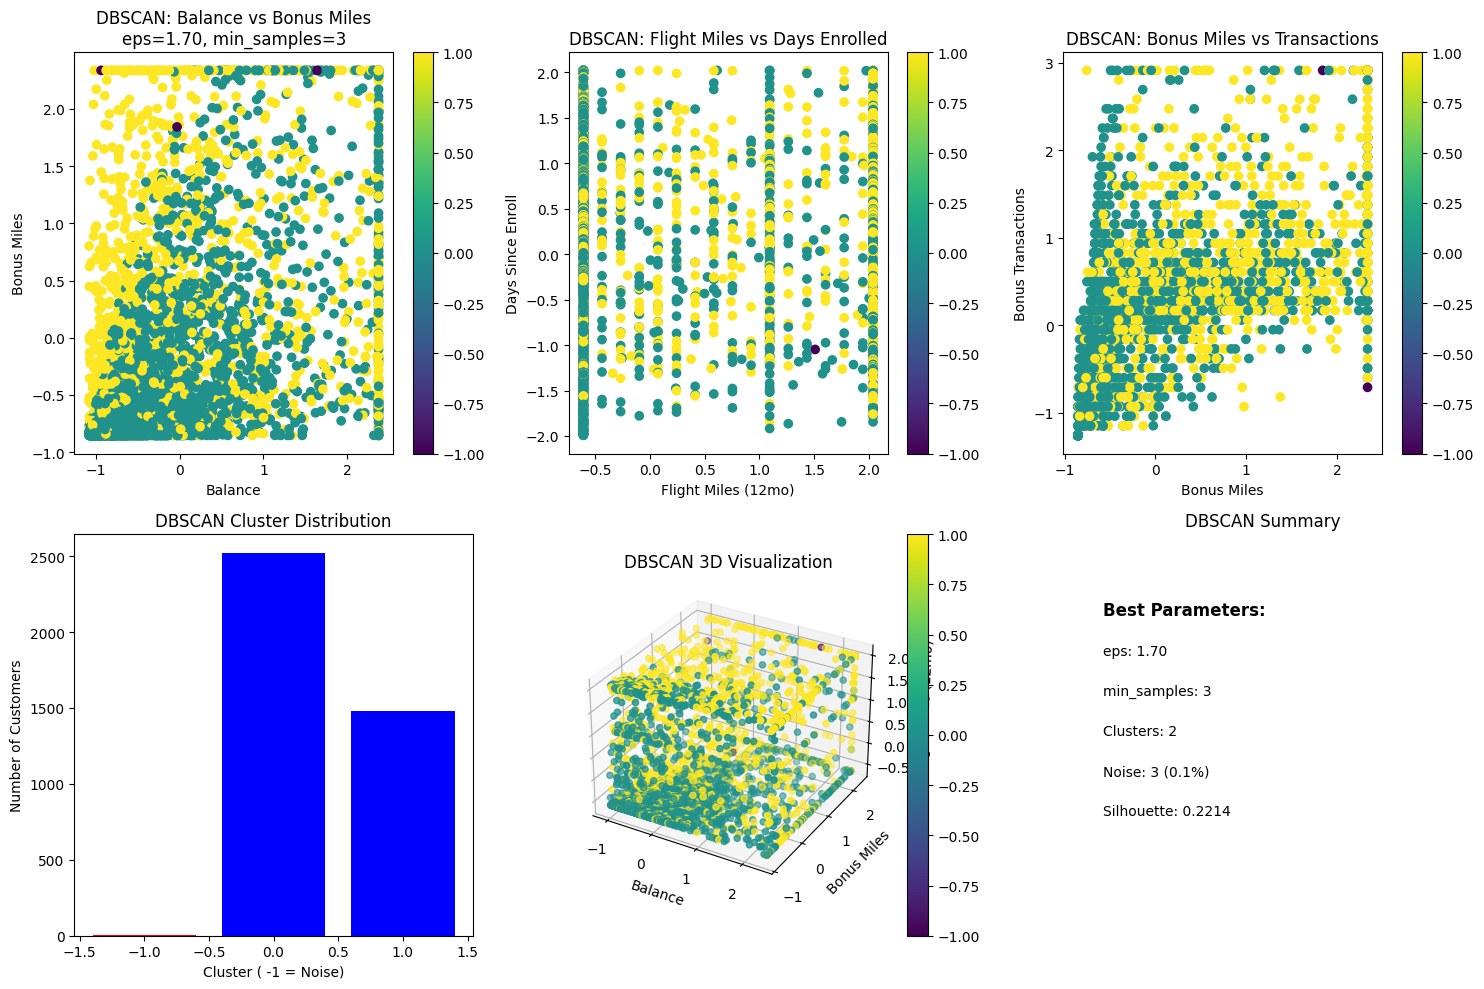

In [187]:
# Visualize DBSCAN clustering results
plt.figure(figsize=(15, 10))

# Plot 1: Balance vs Bonus_miles colored by DBSCAN clusters
plt.subplot(2, 3, 1)
scatter = plt.scatter(d_df['Balance'], d_df['Bonus_miles'], c=dbscan_labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.title(f'DBSCAN: Balance vs Bonus Miles\neps={best_eps:.2f}, min_samples={best_min_samples}')

# Plot 2: Flight_miles_12mo vs Days_since_enroll
plt.subplot(2, 3, 2)
scatter = plt.scatter(d_df['Flight_miles_12mo'], d_df['Days_since_enroll'], c=dbscan_labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Flight Miles (12mo)')
plt.ylabel('Days Since Enroll')
plt.title('DBSCAN: Flight Miles vs Days Enrolled')

# Plot 3: Bonus_miles vs Bonus_trans
plt.subplot(2, 3, 3)
scatter = plt.scatter(d_df['Bonus_miles'], d_df['Bonus_trans'], c=dbscan_labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Bonus Miles')
plt.ylabel('Bonus Transactions')
plt.title('DBSCAN: Bonus Miles vs Transactions')

# Plot 4: Cluster distribution
plt.subplot(2, 3, 4)
cluster_counts = pd.Series(dbscan_labels).value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color=['red' if x == -1 else 'blue' for x in cluster_counts.index])
plt.xlabel('Cluster ( -1 = Noise)')
plt.ylabel('Number of Customers')
plt.title('DBSCAN Cluster Distribution')

# Plot 5: 3D visualization (if we have reasonable number of clusters)
if n_clusters > 0 and n_clusters <= 10:
    from mpl_toolkits.mplot3d import Axes3D

    ax = plt.subplot(2, 3, 5, projection='3d')
    scatter = ax.scatter(d_df['Balance'], d_df['Bonus_miles'], d_df['Flight_miles_12mo'],
                        c=dbscan_labels, cmap='viridis')
    ax.set_xlabel('Balance')
    ax.set_ylabel('Bonus Miles')
    ax.set_zlabel('Flight Miles (12mo)')
    ax.set_title('DBSCAN 3D Visualization')
    plt.colorbar(scatter)

plt.subplot(2, 3, 6)
# Show the parameters used
plt.text(0.1, 0.8, f'Best Parameters:', fontsize=12, fontweight='bold')
plt.text(0.1, 0.7, f'eps: {best_eps:.2f}', fontsize=10)
plt.text(0.1, 0.6, f'min_samples: {best_min_samples}', fontsize=10)
plt.text(0.1, 0.5, f'Clusters: {n_clusters}', fontsize=10)
plt.text(0.1, 0.4, f'Noise: {n_noise} ({(n_noise/len(d_df))*100:.1f}%)', fontsize=10)
if n_clusters > 1:
    plt.text(0.1, 0.3, f'Silhouette: {dbscan_silhouette:.4f}', fontsize=10)
plt.axis('off')
plt.title('DBSCAN Summary')

plt.tight_layout()
plt.show()

# **Evaluation and Performance Metrics**

In [188]:
from sklearn.metrics import silhouette_score
print("Clustering Silhoutte Score:")
print(f"K-Means: {silhouette_score(df, kmn.labels_)}")
print(f"Heirarchical: {best_score:.4f}")
print(f"DBSCAN: {dbscan_silhouette:.4f}")

Clustering Silhoutte Score:
K-Means: 0.36364417906747015
Heirarchical: 0.3324
DBSCAN: 0.2214


In [189]:
from sklearn.metrics import silhouette_score

# Evaluate K-Means clustering using silhouette score
if 'Predict' in df.columns and len(df['Predict'].unique()) > 1:
  kmeans_silhouette = silhouette_score(df.drop(columns=['Predict', 'DBSCAN_Cluster'], errors='ignore'), df['Predict'])
  print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
else:
  print("K-Means clusters not found or only one cluster present.")

# Evaluate DBSCAN clustering using silhouette score
if 'DBSCAN_Cluster' in d_df.columns and len(d_df['DBSCAN_Cluster'].unique()) > 1:
  # Exclude noise points (-1) from silhouette score calculation
  non_noise_indices = d_df['DBSCAN_Cluster'] != -1
  if non_noise_indices.sum() > 1:
    dbscan_silhouette = silhouette_score(d_df.loc[non_noise_indices].drop(columns=['Predict', 'DBSCAN_Cluster'], errors='ignore'), d_df.loc[non_noise_indices, 'DBSCAN_Cluster'])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
  else:
    print("DBSCAN found only one cluster or only noise points (excluding noise).")
else:
  print("DBSCAN clusters not found or only one cluster present.")

K-Means Silhouette Score: 0.3308
DBSCAN clusters not found or only one cluster present.
